In [659]:
#convilution neural network

In [661]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
# Imports a Flatten layer to convert the image matrix into a vector
# Defines the neural network architecture
model.add( Flatten(input_shape = (28,28) ))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [675]:
!pip install opencv-python

In [677]:
import os
# Check the current working directory
print(os.getcwd())
# Check if the file exists
file_path = 'input.jfif'
print(os.path.exists(file_path))

C:\Users\ashis\Work\Project\Hawk\Code\Edureka
False


In [679]:
import os, json, cv2, random
import matplotlib.pyplot as plt
# Your code...
img = cv2.imread('input.jfif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [681]:
img

In [663]:
from tensorflow.keras.datasets import mnist
# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


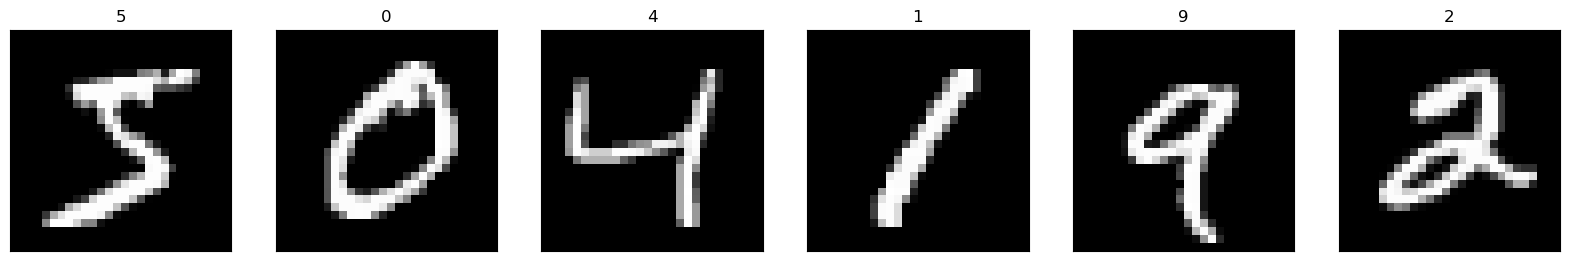

In [665]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
 ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
 ax.imshow(X_train[i], cmap='gray')
 ax.set_title(str(y_train[i]))

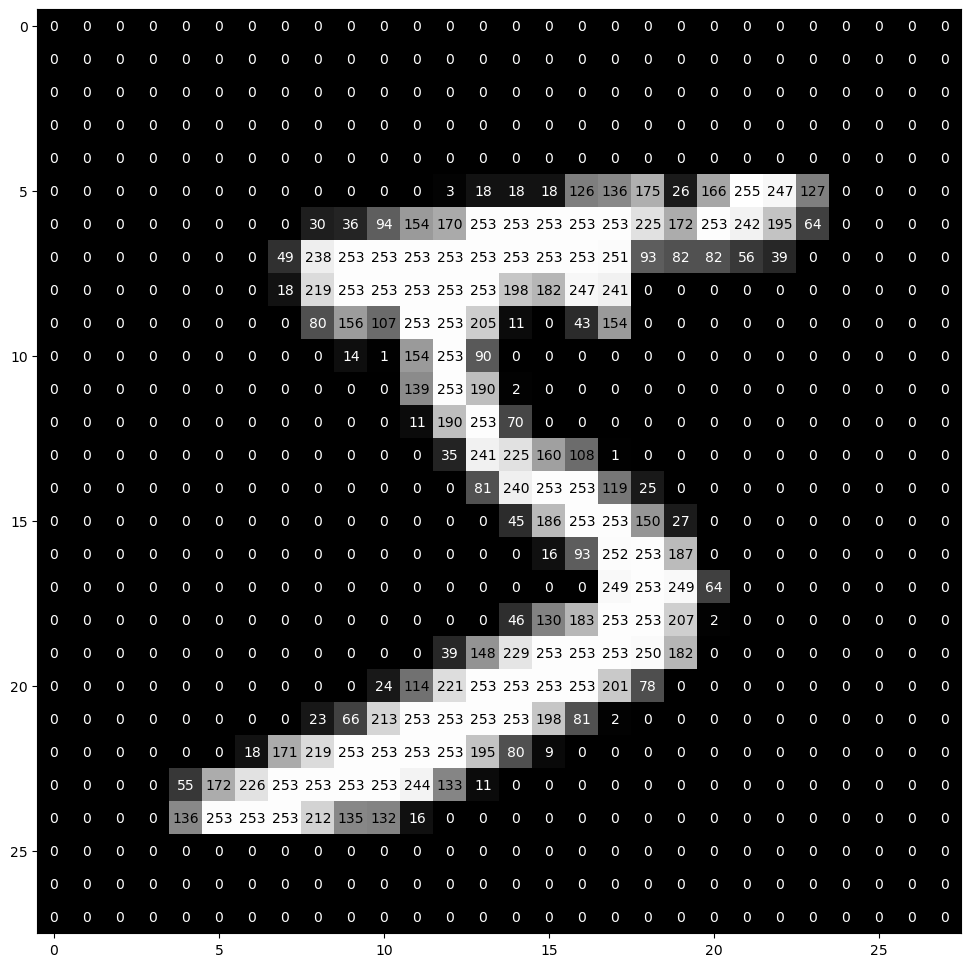

In [669]:
 def visualize_input(img, ax):
     ax.imshow(img, cmap='gray')
     width, height = img.shape
     thresh = img.max()/2.5
     for x in range(width):
         for y in range(height):
             ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                         horizontalalignment='center',
                         verticalalignment='center',
                         color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [673]:
#Preprocess input images: Rescale the Images by Dividing Every Pixel in Every Image by 255

In [683]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [685]:
#5. Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

In [689]:
pip install np_utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56447 sha256=4c8cf3260871a87125302395a2b15f9fb44fa62ece229fc2225afa835e4bfc99
  Stored in directory: c:\users\ashis\appdata\local\pip\cache\wheels\dd\bd\f5\0975fe5179dfa2f996b436596b159824432fb3c1ca74bcf43e
Successfully built np_utils
Note: you may need to restart the kernel to use updated packages.


In [703]:
import numpy as np
from tensorflow.keras.utils import to_categorical

num_classes = 10

# Assuming y_train and y_test are your label arrays
print('Integer-valued labels:')
print(y_train[:10])

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('One-hot labels:')
print(y_train[:10])


Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [705]:
#6. Reshape data to fit our CNN (and input_shape)

In [707]:
# input image dimensions 28x28 pixel images.
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [709]:
#Define the Model Architecture

In [729]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalMaxPooling2D
# build the model object
model = Sequential()
# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
#model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(height, width, channels)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1)))

# POOL_1: downsample the image to choose the best features
model.add(MaxPooling2D(pool_size=(2, 2)))
# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu'))
# FC_2: output a softmax to squash the matrix into output probabilities for the 10 class
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [731]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
 metrics=['accuracy'])

In [733]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

# Train the model
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
                 validation_data=(X_test, y_test), callbacks=[checkpointer],
                 verbose=2, shuffle=True)


Epoch 1/10

Epoch 1: val_loss improved from inf to 0.07711, saving model to model.weights.best.keras
938/938 - 7s - 8ms/step - accuracy: 0.9526 - loss: 0.1550 - val_accuracy: 0.9731 - val_loss: 0.0771
Epoch 2/10

Epoch 2: val_loss improved from 0.07711 to 0.03419, saving model to model.weights.best.keras
938/938 - 7s - 7ms/step - accuracy: 0.9859 - loss: 0.0442 - val_accuracy: 0.9875 - val_loss: 0.0342
Epoch 3/10

Epoch 3: val_loss improved from 0.03419 to 0.02850, saving model to model.weights.best.keras
938/938 - 6s - 6ms/step - accuracy: 0.9907 - loss: 0.0309 - val_accuracy: 0.9905 - val_loss: 0.0285
Epoch 4/10

Epoch 4: val_loss improved from 0.02850 to 0.02533, saving model to model.weights.best.keras
938/938 - 6s - 6ms/step - accuracy: 0.9929 - loss: 0.0222 - val_accuracy: 0.9917 - val_loss: 0.0253
Epoch 5/10

Epoch 5: val_loss did not improve from 0.02533
938/938 - 6s - 6ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9909 - val_loss: 0.0292
Epoch 6/10

Epoch 6: val_

In [734]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'model.weights.best.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

In [737]:
import keras
# Get the list of available datasets in Keras
available_datasets = [name for name in dir(keras.datasets) if not name.startswith('_')]
print("Available datasets in Keras:", available_datasets)

Available datasets in Keras: ['boston_housing', 'california_housing', 'cifar10', 'cifar100', 'fashion_mnist', 'imdb', 'mnist', 'reuters']


In [741]:
from keras.datasets import reuters
# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# Define the labels for Reuters dataset
# Note: There are 46 topics (0 to 45)
reuters_labels = [
 "cocoa", "grain", "veg-oil", "earn", "acq", "wheat", "copper", "housing",
 "money-supply", "coffee", "sugar", "trade", "reserves", "ship", "cotton",
 "carcass", "crude", "nat-gas", "cpi", "money-fx", "interest", "gnp", "meal-feed",
 "alum", "oilseed", "gold", "tin", "strategic-metal", "livestock", "retail",
 "ipi", "iron-steel", "rubber", "heat", "jobs", "lei", "bop", "zinc", "orange",
 "pet-chem", "dlr", "gas", "silver", "wpi", "hog", "lead"
]
# Print the labels for the Reuters test dataset
print("Labels of Reuters dataset:")
for label_index in test_labels:
 print(reuters_labels[label_index])

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Labels of Reuters dataset:
earn
sugar
grain
acq
acq
earn
earn
earn
earn
earn
wheat
acq
grain
earn
grain
trade
alum
earn
money-fx
earn
money-supply
earn
earn
earn
coffee
earn
acq
copper
sugar
earn
earn
sugar
interest
grain
money-fx
acq
dlr
grain
acq
earn
carcass
gnp
earn
jobs
acq
acq
earn
acq
earn
trade
interest
earn
grain
earn
earn
acq
tin
acq
interest
money-fx
acq
earn
acq
acq
acq
earn
earn
grain
earn
acq
gnp
crude
earn
money-fx
wpi
veg-oil
grain
earn
pet-chem
acq
earn
earn
earn
trade
money-fx
interest
grain
trade
acq
earn
earn
acq
earn
acq
earn
trade
trade
earn
interest
livestock
money-supply
grain
interest
earn
earn
veg-oil
acq
acq
acq
acq
earn
earn
acq
earn
heat
earn
acq
acq
earn
acq
earn
acq
money-fx
acq
cpi
earn
money-fx
earn
earn
earn
money-fx
earn
grain
earn
alum
acq
ship
grain
earn
earn
earn
earn
acq
acq
money-fx
acq
acq
oilseed
earn
earn
trade
acq
earn
earn
gas
grain
earn
earn
trade
nat-gas
earn
earn
veg-oil
acq
earn
acq
earn
s

In [743]:
import keras
from keras.datasets import cifar10
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 63s 0us/step


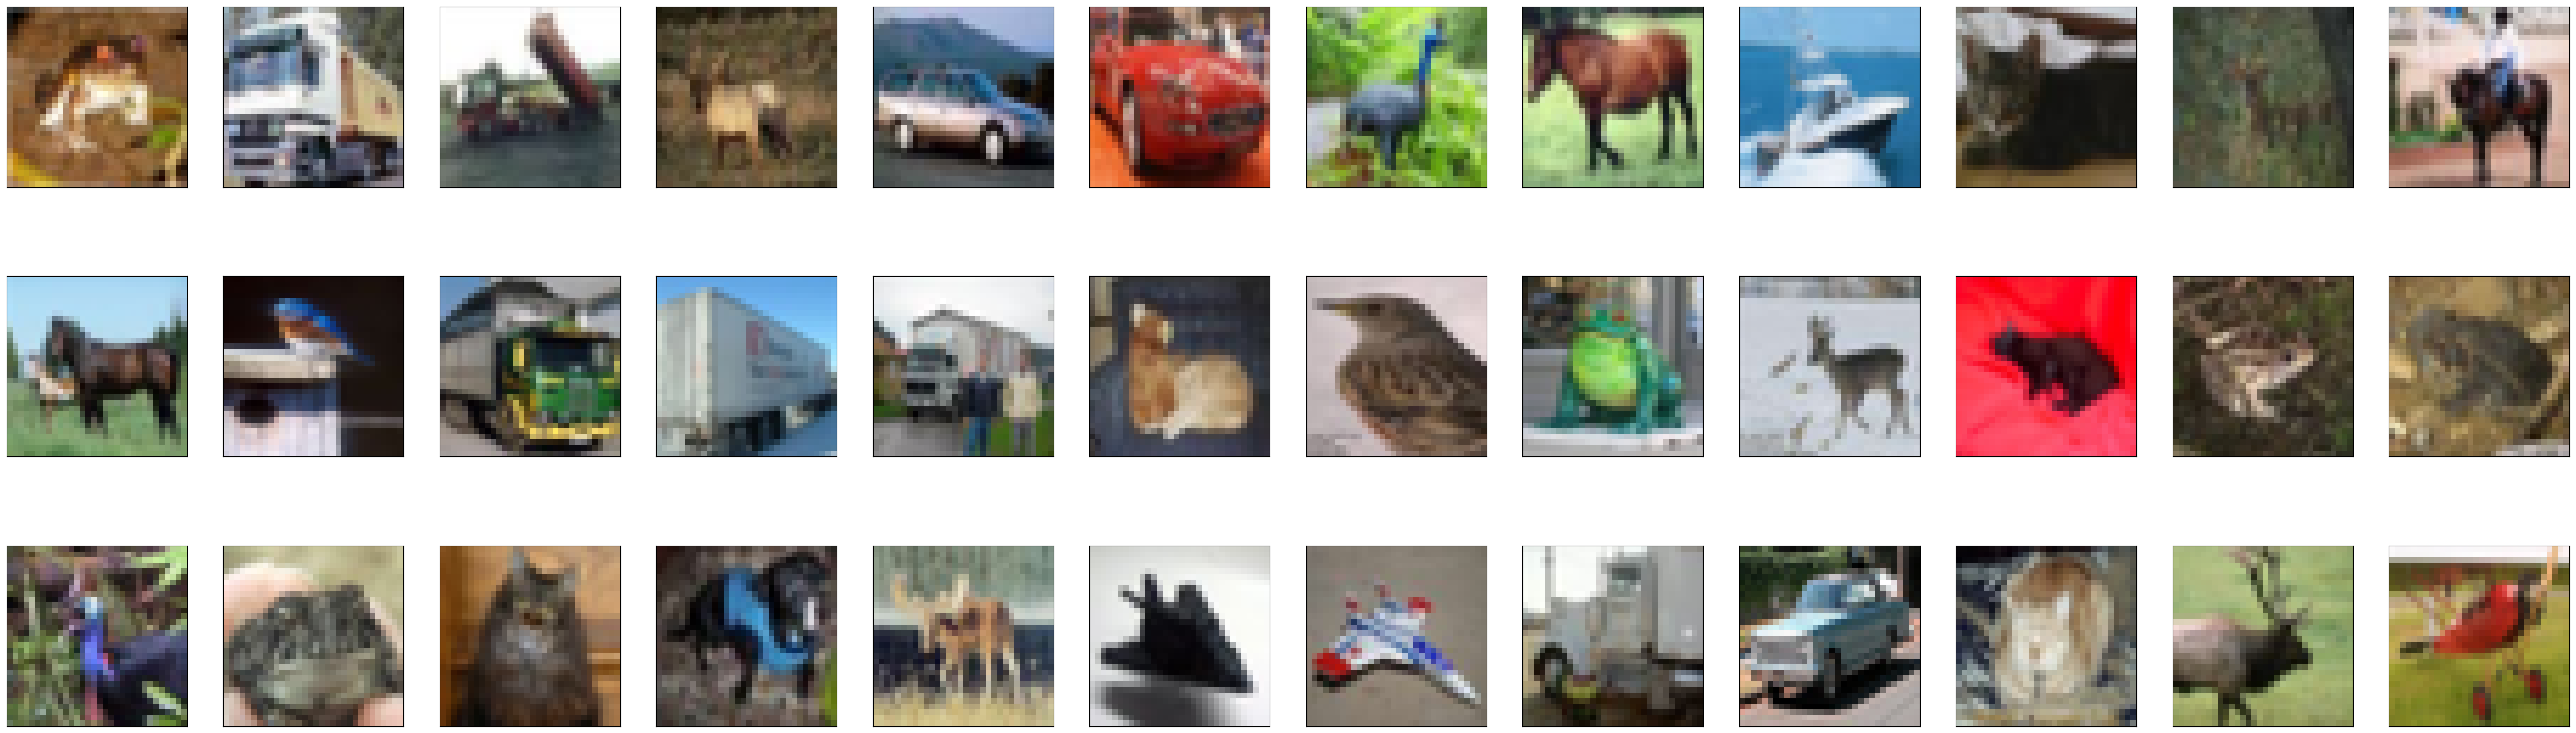

In [744]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(50,15))
for i in range(36):
 ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_train[i]))

In [745]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [751]:
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]
# print shape of training set
print('x_train shape:', x_train.shape)
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')
print(num_classes)

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples
10


In [753]:
# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

Integer-valued labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [755]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',
 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [757]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [763]:
from keras.callbacks import ModelCheckpoint
# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1)
hist = model.fit(x_train, y_train, batch_size=32, epochs=5,
 validation_data=(x_valid, y_valid), callbacks=[checkpointer],
 verbose=2, shuffle=True)

Epoch 1/5

Epoch 1: saving model to model.weights.best.keras
1407/1407 - 9s - 7ms/step - accuracy: 0.4308 - loss: 1.5628 - val_accuracy: 0.5544 - val_loss: 1.2557
Epoch 2/5

Epoch 2: saving model to model.weights.best.keras
1407/1407 - 10s - 7ms/step - accuracy: 0.5742 - loss: 1.1881 - val_accuracy: 0.6442 - val_loss: 1.0141
Epoch 3/5

Epoch 3: saving model to model.weights.best.keras
1407/1407 - 7s - 5ms/step - accuracy: 0.6318 - loss: 1.0357 - val_accuracy: 0.6766 - val_loss: 0.9175
Epoch 4/5

Epoch 4: saving model to model.weights.best.keras
1407/1407 - 10s - 7ms/step - accuracy: 0.6691 - loss: 0.9401 - val_accuracy: 0.7006 - val_loss: 0.8583
Epoch 5/5

Epoch 5: saving model to model.weights.best.keras
1407/1407 - 8s - 6ms/step - accuracy: 0.6936 - loss: 0.8721 - val_accuracy: 0.7188 - val_loss: 0.8207


In [764]:
model.load_weights('model.weights.best.keras')

In [765]:
    model

<Sequential name=sequential_6, built=True>

In [770]:
#Visualize Some Predictions


In [772]:
# get predictions on the test set
y_hat = model.predict(x_test)
# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


IndexError: list index out of range

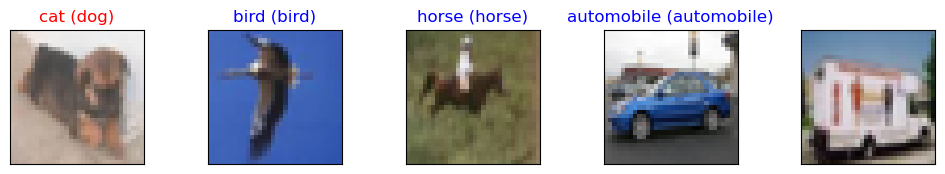

In [774]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
 ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_test[idx]))
 pred_idx = np.argmax(y_hat[idx])
 true_idx = np.argmax(y_test[idx])
 ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
 color=("blue" if pred_idx == true_idx else "red"))

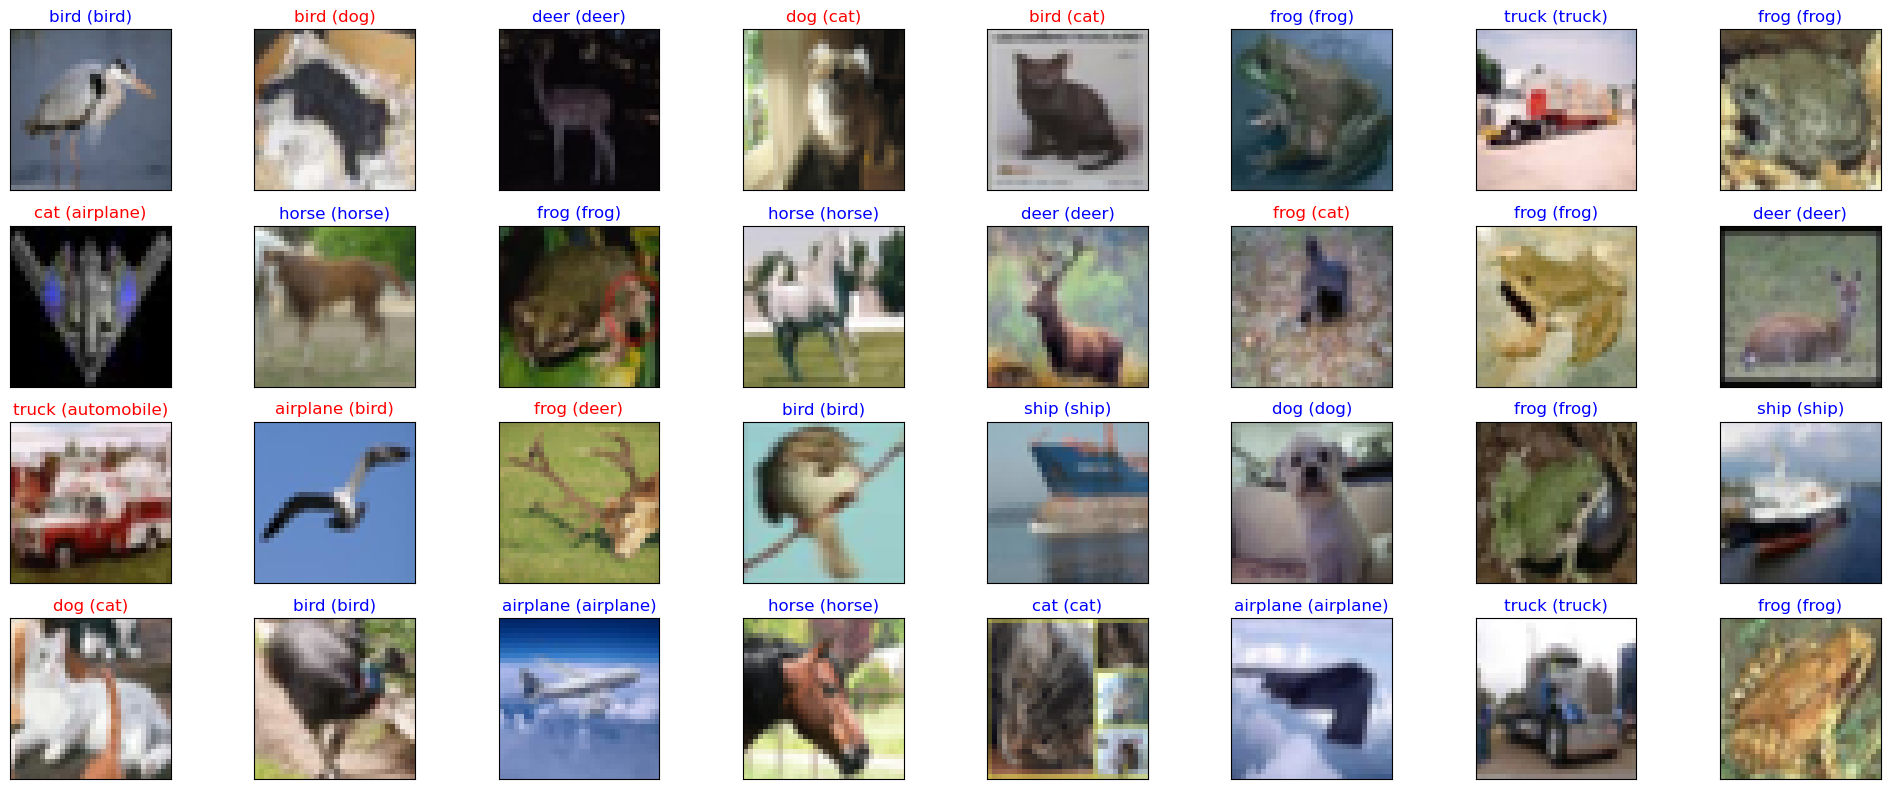

In [776]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure `x_test`, `y_test`, and `y_hat` are NumPy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)
y_hat = np.array(y_hat)

# Define the CIFAR-10 labels if not already defined
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    
    # Ensure the indices are within range
    pred_idx = np.argmax(y_hat[idx]) if y_hat.shape[1] > 1 else np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx]) if y_test.shape[1] > 1 else np.argmax(y_test[idx])
    
    # Check if indices are within the range of labels
    if pred_idx < len(cifar10_labels) and true_idx < len(cifar10_labels):
        ax.set_title(f"{cifar10_labels[pred_idx]} ({cifar10_labels[true_idx]})",
                     color=("blue" if pred_idx == true_idx else "red"))
    else:
        ax.set_title("Unknown label", color="black")

plt.tight_layout()
plt.show()
